<a href="https://colab.research.google.com/github/MikolajKasprzyk/data_science_bootcamp/blob/main/05_uczenie_maszynowe_sklearn/04_regresja_liniowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn

### <a name='a1'></a> Regresja Liniowa - wprowadzenie

Zdefiniujmy:
- $X_1, X_2, ..., X_n$ - zmienne niezależne (nasze dane do modelu)
- $Y$ - zmienna docelowa
- $y_{true}$ - wartość rzeczywista
- $y_{pred}$ - wartość przewidziana przez model
- $w_0, w_1,...,w_n$ - wagi do modelu (podlegaja uczeniu)

W tym modelu zakłada się. ze wartość przewidywana $y_{pred}$ może być liniową kombinacją zmiennych niezależnych. Ogólna postac modelu:

>  $$y_{pred}(W, X) = w_0 + w_1X_1 + ... + w_nX_n$$
>  $$Y = XW$$

gdzie:
>  $X = \begin{pmatrix} 1 & X_1 & X_2 & \dots & X_n\end{pmatrix}$,  $W = \begin{pmatrix} w_{0} \\  w_{1}  \\ \dots \\ w_{n}\end{pmatrix}$

Wprowadźmy oznaczenia:
- $w = (w_1,...w_n)$ jako `coef_`
- $w_0$ jako `intercept_`

Regresja Liniowa polega na takim dopasowaniu wag $w_0, w_1,...,w_n$ by zminimalizować funkcję kosztu(cost function):
>$$||XW-Y||_{2}^{2} \rightarrow min$$  

Przykład w $R^2$:  
$Y=w_0 + w_1X_1$

Przykład w $R^3$:  
$Y=w_0 + w_1X_1 + w_2X_2$


### Podstawowe założenia regresji liniowej

* mamy zależność liniową
* wariancja reszt jest taka sama dla wszystkich obserwacji
* brak współliniowości (żaden z predyktorów nie stanowi kombinacji liniowej innych predyktorów)

<a name='a2'></a> Wygenerowanie danych

Przykład w $R^2$:  
$Y=w_0 + w_1X_1$

In [ ]:
# najprostszy przyklad 1 zmienna niezalezna i jedna zmienna docelowa
import numpy as np
np.random.seed(10)

X = np.arange(0, 50, 0.5)
noise = 10 * np.random.randn(100)
y = 2 * X + 100 + noise
X = X.reshape(-1, 1)

print('Rozmiar X:',X.shape) # 100 rows, 1 column
print('Rozmiar y:', y.shape) # one dimensional array

Rozmiar X: (100, 1)
Rozmiar y: (100,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train_shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape: (75, 1)
X_test shape: (25, 1)
y_train_shape (75,)
y_test shape (25,)


# Wizualizacja

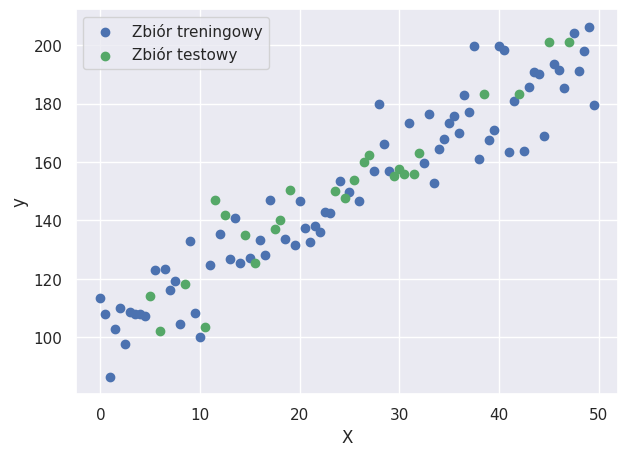

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(7, 5))
plt.scatter(X_train, y_train, c='b', label='Zbiór treningowy')
plt.scatter(X_test, y_test, c='g', label='Zbiór testowy')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

## Regresja liniowa

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_)
print(model.intercept_)

[1.93438329]
101.86187237393071


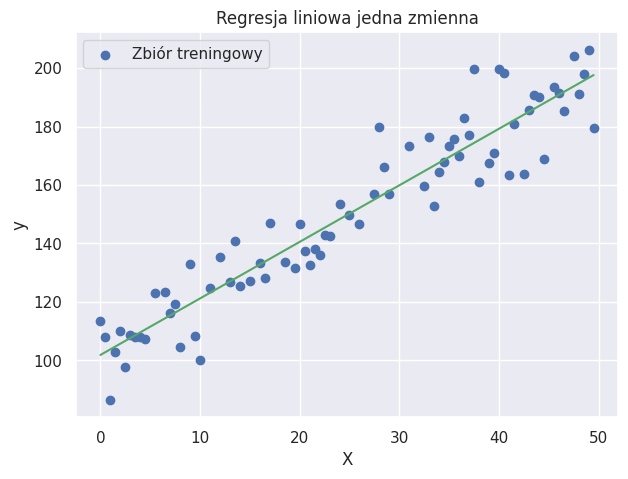

In [ ]:
plt.figure(figsize=(7, 5))
plt.title('Regresja liniowa jedna zmienna')
plt.scatter(X_train, y_train, c='b', label='Zbiór treningowy')
plt.plot(X, model.intercept_ + model.coef_[0] * X, c='g')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

In [ ]:
# jest to metoda najmniejszych kwadratow

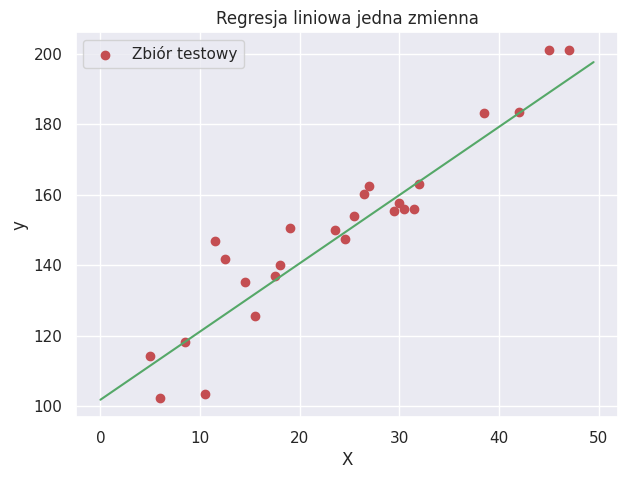

In [ ]:
plt.figure(figsize=(7, 5))
plt.title('Regresja liniowa jedna zmienna')
plt.scatter(X_test, y_test, c='r', label='Zbiór testowy')
plt.plot(X, model.intercept_ + model.coef_[0] * X, c='g')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

### <a name='a8'></a> Ocena modelu
Metoda `score()` zwraca współczynnik determinacji $R^2$  naszej predykcji.

Współczynnik determinacji jest zdefiniowany jako:

### $R^{2} =1 - \frac{\sum_{t=1}^{n}(y_{pred, t} - \bar{y}_{true} )^2}{\sum_{t=1}^{n}(y_{true, t} - \bar{y}_{true} )^2}$

Współczynnik determinacji jest miarą stopnia dopasowania modelu do próby. Dopasowanie modelu jest tym lepsze im wartość $R^2$ jest bliżej 1.

In [ ]:
# ocena modelu
model.score(X_test, y_test)

0.8773651467468433

In [ ]:
model.score? # wyswietla pomoc